In [ ]:
!pip install tf-keras-vis

     |████████████████████████████████| 53 kB 1.4 MB/s 


In [ ]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
 
import tensorflow as tf
from tf_keras_vis.utils import num_of_gpus
 
_, gpus = num_of_gpus()
print('Tensorflow recognized {} GPUs'.format(gpus))

Tensorflow recognized 1 GPUs


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16 as Model
 
# Load model
model = Model(weights='imagenet', include_top=True)
model.summary()

553476096/553467096 [==============================] - 8s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
from tf_keras_vis.activation_maximization import ActivationMaximization
from tf_keras_vis.activation_maximization.input_modifiers import Jitter, Rotate2D, Scale
from tf_keras_vis.activation_maximization.regularizers import Norm, TotalVariation2D
from tf_keras_vis.activation_maximization.callbacks import Progress, PrintLogger
from tf_keras_vis.utils.model_modifiers import ExtractIntermediateLayer, ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore

def visualize_layer(model, layer_name, scores):
  def model_modifier_function(current_model):
    target_layer = current_model.get_layer(name=layer_name)
    target_layer.activation = tf.keras.activations.linear
    new_model = tf.keras.Model(inputs=current_model.inputs,
                               outputs=target_layer.output)
    return new_model

  activation_maximization = ActivationMaximization(
      model,
      model_modifier=model_modifier_function,
      clone=True,
  )

  seed_input = tf.random.uniform((len(scores.indices), 224, 224, 3), 0, 255)

  # Generate maximized activation
  activations = activation_maximization(
      scores,
      seed_input=seed_input,
      callbacks=[Progress()],
  )

  return activations

In [ ]:
def get_oshape(model, layer):
  return model.get_layer(layer).output_shape[-1]

In [ ]:
%%time
layer_name = 'block1_conv1'
activations_b1c1 = visualize_layer(model, layer_name, CategoricalScore([i for i in range(get_oshape(model, layer_name))]))

200/200 [==============================] - 337s 2s/step - Score: 637.8348 - TotalVariation2D: 4.4818 - Norm: 67.2316
CPU times: user 5min 32s, sys: 1.37 s, total: 5min 34s
Wall time: 5min 37s


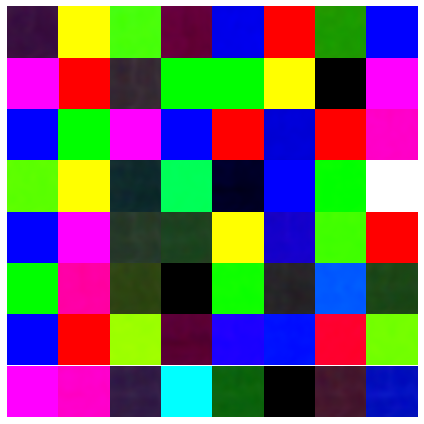

In [ ]:
# Render
f, ax = plt.subplots(nrows=8, ncols=8, figsize=(6, 6))
# for i in range(o_size):
for i in range(8):
  for j in range(8):
    ax[i, j].imshow(activations_b1c1[i*8+j])
    # ax[i].set_title(title, fontsize=16)
    ax[i, j].axis('off')

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [ ]:
%%time
layer_name = 'block1_conv2'
activations_b1c2 = visualize_layer(model, layer_name, CategoricalScore([i for i in range(get_oshape(model, layer_name))]))

200/200 [==============================] - 424s 2s/step - Score: 3519.0471 - TotalVariation2D: 25.9140 - Norm: 90.2976
CPU times: user 6min 37s, sys: 1.96 s, total: 6min 39s
Wall time: 7min 4s


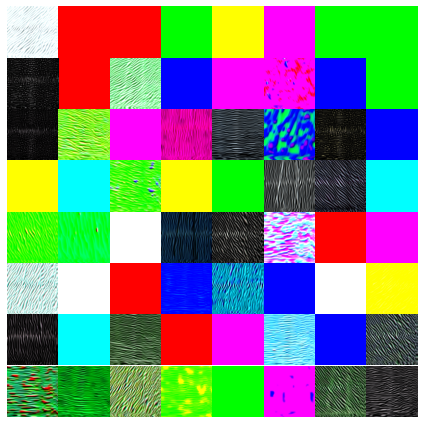

In [ ]:
# Render
f, ax = plt.subplots(nrows=8, ncols=8, figsize=(6, 6))
# for i in range(o_size):
for i in range(8):
  for j in range(8):
    ax[i, j].imshow(activations_b1c2[i*8+j])
    # ax[i].set_title(title, fontsize=16)
    ax[i, j].axis('off')

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [ ]:
%%time
layer_name = 'block2_conv1'
activations_b2c1 = visualize_layer(model, layer_name, CategoricalScore([i for i in range(0, get_oshape(model, layer_name), 8)]))

200/200 [==============================] - 100s 490ms/step - Score: 1536.7228 - TotalVariation2D: 28.8991 - Norm: 57.0684
CPU times: user 1min 23s, sys: 1.52 s, total: 1min 24s
Wall time: 1min 41s


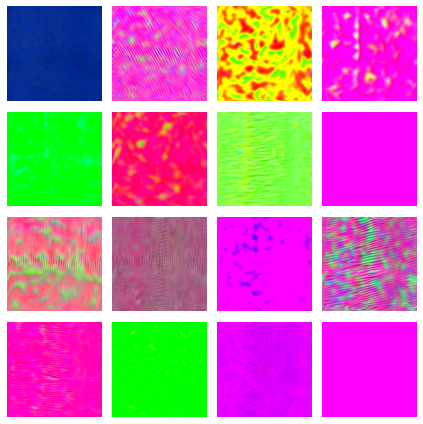

In [ ]:
# Render
f, ax = plt.subplots(nrows=4, ncols=4, figsize=(6, 6))
# for i in range(o_size):
for i in range(4):
  for j in range(4):
    ax[i, j].imshow(activations_b2c1[i*4+j])
    # ax[i].set_title(title, fontsize=16)
    ax[i, j].axis('off')

plt.tight_layout()
# plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [ ]:
%%time
layer_name = 'block2_conv2'
activations_b2c2 = visualize_layer(model, layer_name, CategoricalScore([i for i in range(0, get_oshape(model, layer_name), 8)]))

200/200 [==============================] - 117s 580ms/step - Score: 1622.6655 - TotalVariation2D: 33.4170 - Norm: 46.8016
CPU times: user 1min 33s, sys: 1.64 s, total: 1min 35s
Wall time: 1min 58s


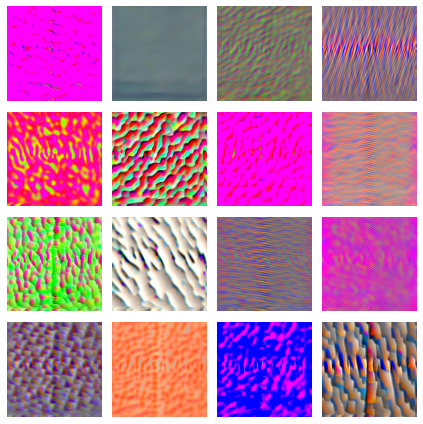

In [ ]:
# Render
f, ax = plt.subplots(nrows=4, ncols=4, figsize=(6, 6))
# for i in range(o_size):
for i in range(4):
  for j in range(4):
    ax[i, j].imshow(activations_b2c2[i*4+j])
    # ax[i].set_title(title, fontsize=16)
    ax[i, j].axis('off')

plt.tight_layout()
# plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [ ]:
%%time
layer_name = 'block3_conv1'
activations_b3c1 = visualize_layer(model, layer_name, CategoricalScore([i for i in range(0, get_oshape(model, layer_name), 16)]))

200/200 [==============================] - 112s 556ms/step - Score: 5175.9443 - TotalVariation2D: 41.6165 - Norm: 43.6072
CPU times: user 1min 33s, sys: 1.29 s, total: 1min 34s
Wall time: 1min 52s


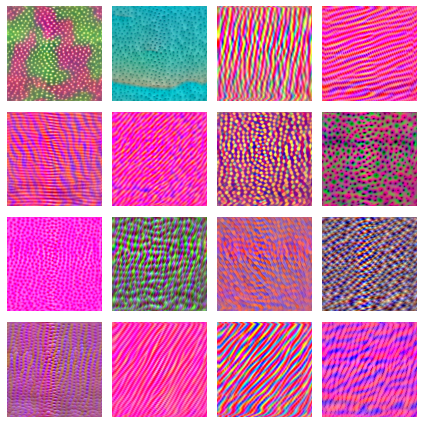

In [ ]:
# Render
f, ax = plt.subplots(nrows=4, ncols=4, figsize=(6, 6))
# for i in range(o_size):
for i in range(4):
  for j in range(4):
    ax[i, j].imshow(activations_b3c1[i*4+j])
    # ax[i].set_title(title, fontsize=16)
    ax[i, j].axis('off')

plt.tight_layout()
# plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [ ]:
%%time
layer_name = 'block3_conv3'
activations_b3c3 = visualize_layer(model, layer_name, CategoricalScore([i for i in range(0, get_oshape(model, layer_name), 16)]))

200/200 [==============================] - 127s 632ms/step - Score: 6923.7876 - TotalVariation2D: 36.9837 - Norm: 42.6486
CPU times: user 1min 44s, sys: 1.49 s, total: 1min 45s
Wall time: 2min 7s


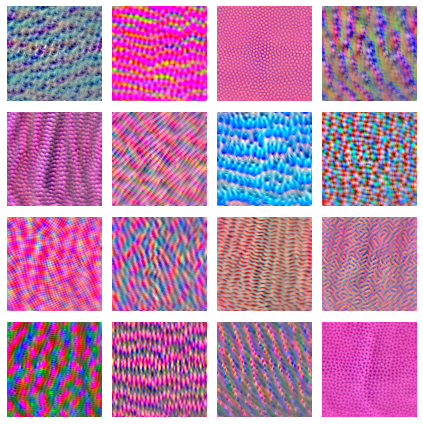

In [ ]:
# Render
f, ax = plt.subplots(nrows=4, ncols=4, figsize=(6, 6))
# for i in range(o_size):
for i in range(4):
  for j in range(4):
    ax[i, j].imshow(activations_b3c3[i*4+j])
    # ax[i].set_title(title, fontsize=16)
    ax[i, j].axis('off')

plt.tight_layout()
# plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [ ]:
%%time
layer_name = 'block4_conv3'
activations_b4c3 = visualize_layer(model, layer_name, CategoricalScore([i for i in range(0, get_oshape(model, layer_name), 32)]))

200/200 [==============================] - 155s 769ms/step - Score: 2865.0962 - TotalVariation2D: 26.8725 - Norm: 42.0398
CPU times: user 2min, sys: 2.07 s, total: 2min 2s
Wall time: 2min 35s


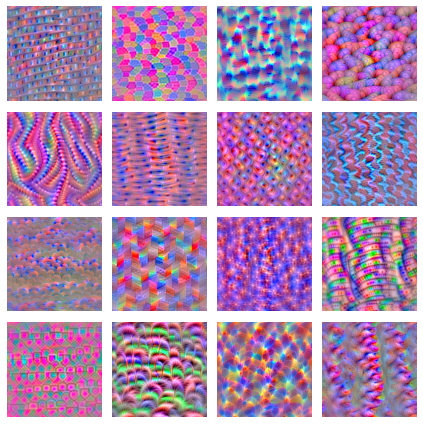

In [ ]:
# Render
f, ax = plt.subplots(nrows=4, ncols=4, figsize=(6, 6))
# for i in range(o_size):
for i in range(4):
  for j in range(4):
    ax[i, j].imshow(activations_b4c3[i*4+j])
    # ax[i].set_title(title, fontsize=16)
    ax[i, j].axis('off')

plt.tight_layout()
# plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [ ]:
%%time
layer_name = 'block5_conv3'
activations_b5c3 = visualize_layer(model, layer_name, CategoricalScore([i for i in range(0, get_oshape(model, layer_name), 32)]))

200/200 [==============================] - 153s 766ms/step - Score: 841.8895 - TotalVariation2D: 21.8177 - Norm: 39.6302
CPU times: user 2min 2s, sys: 1.86 s, total: 2min 4s
Wall time: 2min 33s


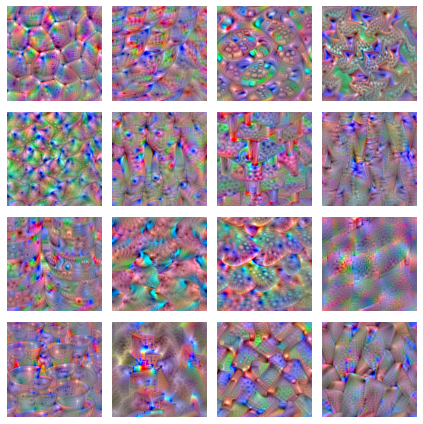

In [ ]:
# Render
f, ax = plt.subplots(nrows=4, ncols=4, figsize=(6, 6))
# for i in range(o_size):
for i in range(4):
  for j in range(4):
    ax[i, j].imshow(activations_b5c3[i*4+j])
    # ax[i].set_title(title, fontsize=16)
    ax[i, j].axis('off')

plt.tight_layout()
# plt.subplots_adjust(wspace=0, hspace=0)
plt.show()